In [1]:
import pandas as pd
from glob import glob
import os
import numpy as np
import pandas as pd
from tqdm import tqdm, tqdm_notebook

import random
import torch
import torch.nn.functional as F

## Back Translate
### 1. Translate Using Papago(KOR->EN)

In [107]:
from selenium import webdriver 
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import requests
import time
import requests
from bs4 import BeautifulSoup
import os, shutil
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC 

In [4]:
driver=webdriver.Chrome('chromedriver.exe')

<ipython-input-4-ec23c7972a0a>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('chromedriver.exe')


#### Kor > En

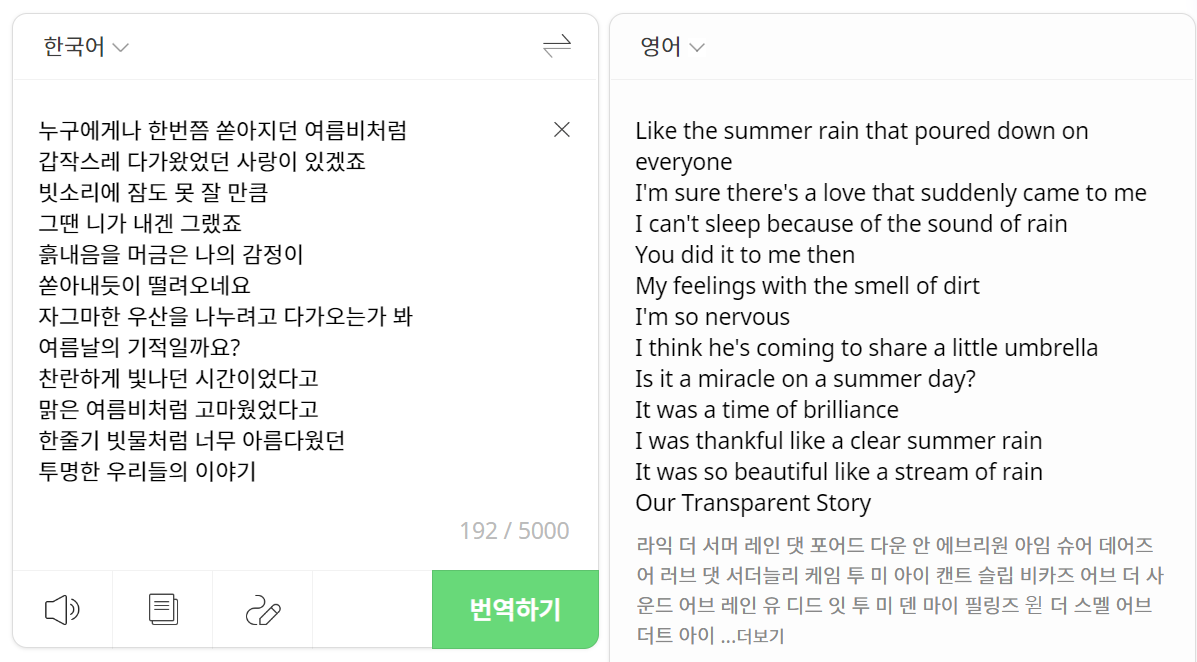

In [50]:
#가상 브라우저 url 열기
translate_url = 'https://papago.naver.com/?sk=ko&tk=en' # sk=ko : Korean & tk=en : English
driver.get(translate_url)

time.sleep(2)

text_kor='''누구에게나 한번쯤 쏟아지던 여름비처럼
갑작스레 다가왔었던 사랑이 있겠죠
빗소리에 잠도 못 잘 만큼
그땐 니가 내겐 그랬죠
흙내음을 머금은 나의 감정이
쏟아내듯이 떨려오네요
자그마한 우산을 나누려고 다가오는가 봐
여름날의 기적일까요?
찬란하게 빛나던 시간이었다고
맑은 여름비처럼 고마웠었다고
한줄기 빗물처럼 너무 아름다웠던
투명한 우리들의 이야기'''

#id가 txtSource인 곳에 번역할 문장을 보낸다.
driver.find_element(By.ID,'txtSource').send_keys(text_kor) # Send_keys
driver

time.sleep(2)

#id가 txtTarget인 곳에서 text를 가져온다.
translated_EN = driver.find_element(By.ID,'txtTarget').text
print(translated_EN)

Like the summer rain that poured down on everyone
I'm sure there's a love that suddenly came to me
I can't sleep because of the sound of rain
You did it to me then
My feelings with the smell of dirt
I'm so nervous
I think he's coming to share a little umbrella
Is it a miracle on a summer day?
It was a time of brilliance
I was thankful like a clear summer rain
It was so beautiful like a stream of rain
Our Transparent Story


### 2. Translate Using Papago(EN->JA)

#### JA > EN

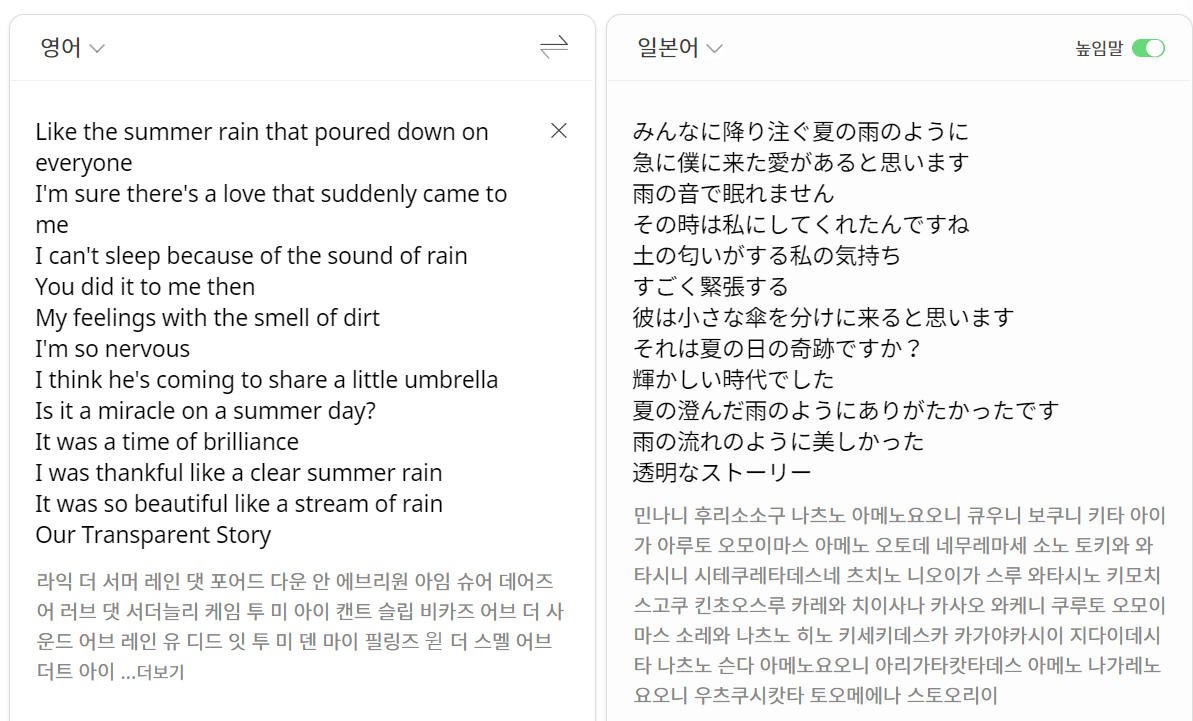

In [52]:
#가상 브라우저 url 열기
translate_url = 'https://papago.naver.com/?sk=en&tk=ja' # sk=en : English & tk=ja : Japan
driver.get(translate_url)

time.sleep(2)

#id가 txtSource인 곳에 번역할 문장을 보낸다.
driver.find_element(By.ID,'txtSource').send_keys(translated_EN) # Send_keys
driver

time.sleep(2)

#id가 txtTarget인 곳에서 text를 가져온다.
translated_JA = driver.find_element(By.ID,'txtTarget').text
print(translated_JA)

みんなに降り注ぐ夏の雨のように
急に僕に来た愛があると思います
雨の音で眠れません
その時は私にしてくれたんですね
土の匂いがする私の気持ち
すごく緊張する
彼は小さな傘を分けに来ると思います
それは夏の日の奇跡ですか？
輝かしい時代でした
夏の澄んだ雨のようにありがたかったです
雨の流れのように美しかった
透明なストーリー


### Translate Using Papago(JA->KOR)

#### JA > KOR


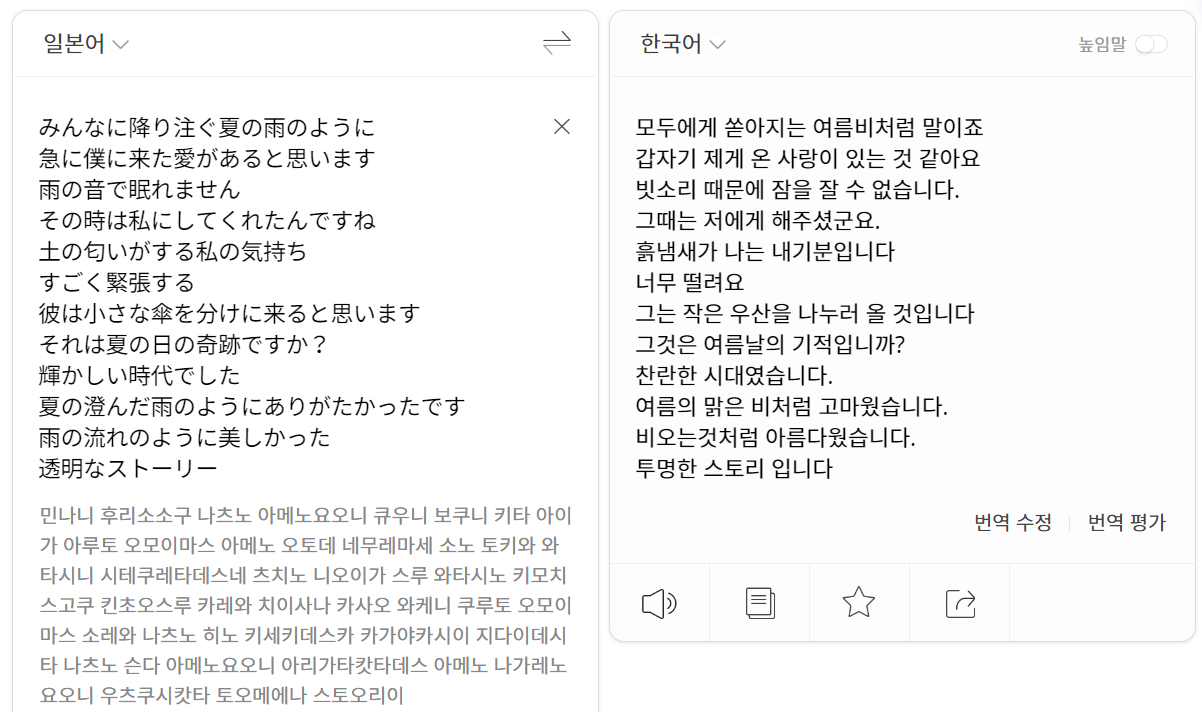

In [56]:
#가상 브라우저 url 열기
translate_url = 'https://papago.naver.com/?sk=ja&tk=ko' # sk=en : English & tk=ja : Japan
driver.get(translate_url)

time.sleep(2)

#id가 txtSource인 곳에 번역할 문장을 보낸다.
driver.find_element(By.ID,'txtSource').send_keys(translated_JA) # Send_keys
driver

time.sleep(2)

#id가 txtTarget인 곳에서 text를 가져온다.
translated_final = driver.find_element(By.ID,'txtTarget').text
print(translated_final)

모두에게 쏟아지는 여름비처럼
갑자기 제게 온 사랑이 있는 것 같아요
빗소리 때문에 잠을 잘 수 없습니다.
그때는 저에게 해주셨군요.
흙냄새가 나는 내기분
너무 떨려
그는 작은 우산을 나누러 올 것입니다
그것은 여름날의 기적입니까?
찬란한 시대였습니다.
여름의 맑은 비처럼 고마웠습니다.
빗줄기처럼 아름다웠다
투명한 스토리


## Back_Translation 함수 구현

#### Back_translate 기능

In [249]:
#함수 구현

def back_translation(input_text, input_type, trans_type):
    
    driver=webdriver.Chrome('chromedriver.exe')
    translate_url = 'https://papago.naver.com/?sk={0}&tk={1}'.format(input_type,trans_type)

    #가상 브라우저 url 열기
    driver.get(translate_url)
    time.sleep(1)    
    
    #id가 txtSource인 곳에 번역할 문장을 보낸다.
    driver.find_element(By.ID,'txtSource').send_keys(input_text) # Send_keys
    time.sleep(2)

    #id가 txtTarget인 곳에서 text를 가져온다.
    translated_contents= driver.find_element(By.ID,'txtTarget').text
    time.sleep(2) 
    
    driver.quit()
    
    return translated_contents

#### 함수 합치기

In [268]:
def back_trans_final(input_text):#번역할 text
    
    #kor>en
    text_en=back_translation(input_text,'ko','en')
    
    time.sleep(1)
    #en>ja
    text_ja=back_translation(text_en,'en','ja')
    
    time.sleep(1)
    #ja>kor
    text_final=back_translation(text_ja,'ja','ko')
    
    return text_final

In [251]:
#함수가 잘 작동이 되는지 test
dfdf=pd.DataFrame(['안녕','건강하게 살기 위해서는 운동이 중요한 요소이다.'])
dfdf[0]

0                            안녕
1    건강하게 살기 위해서는 운동이 중요한 요소이다.
Name: 0, dtype: object

In [252]:
dfdf[0]=dfdf[0].apply(back_trans_final)
dfdf[0]

<ipython-input-249-e6643c398475>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('chromedriver.exe')


0                      안녕하세요.
1    운동은 건강하게 사는 데 중요한 요소입니다.
Name: 0, dtype: object

## 수사기관 사칭형 Back_Translate

In [253]:
#데이터 불러오기
data=pd.read_csv('사칭형_phising_data.csv')
data.head()

,comments
0,"네, 우선은 제가 이번 사건에 연루된 혐의가 있기 때문에요 저희 검찰로 오셔서 간단..."
1,범죄수사팀의 김홍식수사관입니다 통화안녕하십니까 다른 게 아니라 본인이 연루된 사건에...
2,여보세요? 통화 가능하시죠 어디에요? 전 서울중앙지검에 금융 범죄 예방수사기획팀의 ...
3,네. 네. 다름이 아니고 오늘 본인과 연루된 명의 도용 사건이 있어서 확인차 연락을...
4,"혹시 라고 알고 계십니까? 왜냐하면 얼마 전 저희 측에서, 왜냐하면 금융사기단을 검..."


In [254]:
data['comments'].head()

0    네, 우선은 제가 이번 사건에 연루된 혐의가 있기 때문에요 저희 검찰로 오셔서 간단...
1    범죄수사팀의 김홍식수사관입니다 통화안녕하십니까 다른 게 아니라 본인이 연루된 사건에...
2    여보세요? 통화 가능하시죠 어디에요? 전 서울중앙지검에 금융 범죄 예방수사기획팀의 ...
3    네. 네. 다름이 아니고 오늘 본인과 연루된 명의 도용 사건이 있어서 확인차 연락을...
4    혹시 라고 알고 계십니까? 왜냐하면 얼마 전 저희 측에서, 왜냐하면 금융사기단을 검...
Name: comments, dtype: object

In [255]:
#파파고 한번에 5000까지만 가능 
#최대 글자 수 확인 
li=[]
for i in range(len(data['comments'])):
    li.append(len(data.iloc[i,0])>5000)
sum(li) #5000자가 넘는 문장의 개수 확인

0

In [256]:
#back_translation진행
data['comments']=data['comments'].apply(back_trans_final)
data['comments']

<ipython-input-249-e6643c398475>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('chromedriver.exe')


0      우선 제가 이 사건에 관여한 혐의가 있기 때문에 당신은 간단한 조사를 위해 우리 검...
1      전화로 범죄수사팀 김홍식 수사관입니다. 방금 당신이 관련된 사건에서 연락이 왔어요....
2      여보세요? 어디 계세요? 서울중앙지검 금융범죄예방수사기획팀 최우철입니다. 중앙지검 ...
3      네, 고객님 명의 도용 사건이 있었는지 확인하기 위해 전화드린 것 뿐입니다.전화로 ...
4      혹시 아시나요? 얼마 전 금융사기 일당을 검거하고 이를 토대로 현장에서 대량의 신용...
                             ...                        
183    몇가지 확인중이라 연락드렸습니다. 지금 얘기할 수 있을까요? 단순한 사정으로 전화한...
184    어서요. 일하는 사람은 알아요. 몰라요? 금융범죄사기단을 추천하는 과정에서 카드은행...
185    10월 23일 서울 영등포구 문래동 지점에서 농협과 신항 은행 계좌를 개설한 적이 ...
186    빙빙 돌리지 말고 말해 보세요. 서울중앙병원 금융범죄팀 윤석 씨를 봤는데 이걸 보면...
187    전화드렸습니다. 연료 사고에 대해 확인하고 싶은 것이 있어서 전화드렸습니다. 김병철...
Name: comments, Length: 188, dtype: object

#### Back Traslate 확인(Test)

In [257]:
#공백으로 저장된 문자 추출
empty=[]
for i in range(len(data['comments'])):
    if (data.loc[i,'comments']=='')|(data.loc[i,'comments']==' '):
        empty.append(i) #공백 문자 인덱스 찾기
print(empty)        

[5, 6, 9, 14, 16, 17, 24, 27, 28, 31, 32, 41, 49, 65, 70, 81, 86, 87, 104, 113, 127, 128, 133, 143, 150, 156, 159, 173, 181]


In [258]:
#데이터 불러오기
df=pd.read_csv('사칭형_phising_data.csv')
df.head()

,comments
0,"네, 우선은 제가 이번 사건에 연루된 혐의가 있기 때문에요 저희 검찰로 오셔서 간단..."
1,범죄수사팀의 김홍식수사관입니다 통화안녕하십니까 다른 게 아니라 본인이 연루된 사건에...
2,여보세요? 통화 가능하시죠 어디에요? 전 서울중앙지검에 금융 범죄 예방수사기획팀의 ...
3,네. 네. 다름이 아니고 오늘 본인과 연루된 명의 도용 사건이 있어서 확인차 연락을...
4,"혹시 라고 알고 계십니까? 왜냐하면 얼마 전 저희 측에서, 왜냐하면 금융사기단을 검..."


In [259]:
#공백으로 된 텍스트만 다시 back translation
for i in empty:
    data.loc[i,'comments']=back_trans_final(df.loc[i,'comments'])
    
#확인
data.loc[empty,'comments']   

<ipython-input-249-e6643c398475>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('chromedriver.exe')


5                                                       
6      역과 전국의 계정이 새롭게 시장에 등장했습니다.뭔가 알고 있는 것이 있습니까? 맞나...
9      하나원에 대해서 알고 있는 것이 있습니까? 하나원에 대한 교회 정보가 나왔다는 이야...
14                                                      
16     명의 도용 사건에 대해 사실관계를 확인하고 싶어서 연락드렸습니다. 혹시 당신은 자신...
17     서울중앙지검 형사1부 정성태 형사입니다. 가장 중요한 사건이 발생해서 몇 가지 확인...
24     여보세요? 네. 박영식 사건 관계자네요. 잠깐만, 왜냐하면 당신은 연료이기 때문입니...
27     안녕하세요. 네. 죄송합니다. 어디에 있다고 하셨죠? 서울중앙지검에 문의해 주세요....
28     봉의 입장을 이해하고 싶지만 이 경우 강한 사람은 불법 도박 사이트를 운영하면서 가...
31     말씀하신 서울중앙지검 최민협 첨단범죄수사1팀장입니다. 다 쓰셨나요? 계속해도 될까요...
32     네, 네, 네. 몰라요. 저는 서울에 갔지만 조사는 하지 않았어요. 남부지검이 현장...
41     네, 이쪽은 서울중앙지검 특수2부의 이상한 수사관입니다.다음에 당신이 관여한 명예 ...
49     이것은 은퇴라고 불리는 것일까요? 김태원씨의 이름을 물어볼 예정은 없습니다. 저는 ...
65     뭐라고요? 당신 이름으로 사건에 대해 확인하고 싶은 게 있어서 전화했어요.스스로 하...
70     여보세요? 됐나요? 안녕하세요 저는 지금 서울장군입니다. 첨단범죄수사팀 박진석 선배...
81     네? 저는 전라도 광주입니다. 감사합니다。 모르는 사람이 있어요? 일단 김상헌 씨 ...
86     네, 여보세요? 서울중앙지검 김철민 수사관입니다. 나는 지금 내가 관리하고 있는 2...
87                             

In [261]:
#위에 보면 아직도 공백으로 저장된 애들이 보임 > 따라서 위 과정 반복
#공백으로 저장된 문자 추출
empty=[]
for i in range(len(data['comments'])):
    if (data.loc[i,'comments']=='')|(data.loc[i,'comments']==' '):
        empty.append(i) #공백 문자 인덱스 찾기
print(empty) 

[5, 6, 14, 87, 159]


In [262]:
#공백으로 된 텍스트만 다시 back translation
for i in empty:
    data.loc[i,'comments']=back_trans_final(df.loc[i,'comments'])
    
#확인
data.loc[empty,'comments'] 

<ipython-input-249-e6643c398475>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('chromedriver.exe')


5      서울중앙지검 김재환 형사입니다. 연락이 끊겼어요. 그렇네요, 우선 컨디션 불량이 확...
6                                                       
14                                                      
87     후보자들은 범죄의 변화를 목격하기 시작했습니다. 즉 지능범죄가 되고 제3의 피해자라...
159                                                     
Name: comments, dtype: object

In [263]:
#위에 보면 아직도 공백으로 저장된 애들이 보임 > 따라서 위 과정 반복
#공백으로 저장된 문자 추출
empty=[]
for i in range(len(data['comments'])):
    if (data.loc[i,'comments']=='')|(data.loc[i,'comments']==' '):
        empty.append(i) #공백 문자 인덱스 찾기
print(empty) 

[6, 14, 159]


In [264]:
#공백으로 된 텍스트만 다시 back translation
for i in empty:
    data.loc[i,'comments']=back_trans_final(df.loc[i,'comments'])
    
#확인
data.loc[empty,'comments']

<ipython-input-249-e6643c398475>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('chromedriver.exe')


6      역과 전국의 계정이 새롭게 시장에 등장했습니다.뭔가 알고 있는 것이 있습니까? 맞나...
14     네, 네. 맛도 다르고 관련된 이름을 도용해서 몇 가지 말씀드렸는데 당신이 전화를 ...
159                                                     
Name: comments, dtype: object

In [279]:
#159행만 다시 back translation진행
text='여러 가지 조언을 받을 수도 있습니다. 근데 근데 저 죄송한데 전화 주신 분은 누구시죠? 저는 검찰 수사관이고요 최정민이고요 팀이 있습니다. 그런데 고모가 지금 이상한 번호로 더 거 주고 어떤 로 나가가지고 지금 아니에요. 저희 이제 이 번호가 맞는건가요. 네. 저희가 이 변호가요. 네. 저희 대표부는 따로 있고요. 지금 천문여쭤볼게요 지금 또 거짓말을 하시고 는 부분들이 있다 라고 하면은 법적으로 가장 처벌받을 수도 있고 이렇게 높은 녹취가 되는 부분이고 좀 할게요. 네네 하시기 바랍니다. 다른 잡음이 다른 쪽으로 이렇게 계속 들리게 되면 법적 효능에 대해서는 뭐 크게 활용할 수가 없습니다. 그러니까 조금 조용하게 정확하게 말씀해주시기 바랍니다. 결과 자 본인이 하시고 않습니까? 지금 개명을 하셔서 지고요 이런 얘기 나주시고요 범죄자출신의 에 대해서 전혀 모르십니까. 이천십오 년 가세요. 이천십오년 이 월 체력입니다 서울시 에서 불리기도 직접적으로 국민은행농협은행 계좌를 각각 하나씩 기소한 사실이 있습니까? 그것도 가본 적도 없어요. 직접적으로 하신 부분이 아니시고 사람 거죠. 먹는 제가 말씀드렸다시피 새롭게 개발이 되었던 라고 님께서 정확하게 모른다 라고 진술을 하셨습니다. 맞습니까? 네. 맞아요. 그게 새로 계산이천십오 년 이월달에 계산이 됐다고 말씀하시는 거잖아요? 아니요. 그 사람들 제가 안 쓴 게 좀 꽤 됐고요. 제가 딸의 월급통장하나랑. 그 다음에 그냥 이 출근할 수 있는 통장을 각각 하나씩 만들었는데 그 돈은 전부 다 만들었어요. 네, 거죠. 지금 거주하고 있는 지역의 어디죠? 지금 계신 거예요. 제가 좀 하고 있어 가지고 말씀하셔도. 그렇게 제가 말씀 드렸듯이 이런 소리가 네. 네. 네. 알겠습니다. 네. 네. 그래서 먼저 말씀 네. 네. 네. 네. 알겠습니다. 하여튼 본인께서는 국민 농협은행을 이천십오 년 개선을 한 사실이 없다 라고 질문을 하셨습니다. 그렇다면 분위기에서 직접적으로 은행권에 가셔서 계절을 했던 은행들은 어디가 있으십니까? 은행 상호방문말씀해 주시죠. 네. 를 했었다라고 했죠. 예전에 있고요. 그 다음에 있고요. 네. 있고요. 그 다음에 은행이 있고요. 네. 있고요. 아닙니까? 네. 뭐 은행 은행별로 조금씩 했는데 자주 쓰는 것 하고 왜 해지를 했다든지 냐 은행 이 있습니까? 제가 그거를 했는지 아니면 지금 는지도 모르겠어요. 혹시라도 큰 돈이 들어가 있진 않으시죠. 네. 그런 것 없는 것, 견제하고 있는 계좌그리고 이런 부분들을 범죄자들은 악용하고 불법 불법 사용을 했다라는 겁니다. 제가 피해자 사례를 봤을 때 그런 모르는 계좌가 몇천만원 몇억원 이상이 되는 들이 불법적인 자금으로 사용됐던 돈이 많아집니다. 그런데 그런 신용카드배급되는 것이 있습니까? 그러니까 있었는데 좀 경기를 봤는데 어디 거죠. 신용카드가 직장에서 발급이 됐는데 지금 정지를 시킨 거예요. 아니면 어떤 거예요? 정지를 했고 이게 언제부턴이 되어 있는 거죠. 는데 몇 년 는데 예를 들어서 뭐 정확한 뭐 이런 게 아니다, 그건 한 이삼년 삼사삼 사 로 쓴 것 같은데 다른 부분을 저희가 해도 되겠습니까? 왜냐하면 은행인데 신용카드가 예를 들어서 삼성은행에서 기소되었다 그러면 아니에요. 저는 신용카드라는 거는 하나 밖에 없었어요. 인터넷 따라서 쓰시는 거예요. 그냥 폭력이상 사용을 안 하시면 자정적으로 해지가 돼요. 그러면 제가 국민인증서는 받아가지고 지금 그냥 그냥 하고 그냥 계속 쓰고 있거든요. 정확하게 모르하는데 스럽죠. 그래서 잘 모르겠어요. 알겠습니다. 이거 외에는 본인께서 전사하신 내용의 제 이 금융권저축은행 마이너스 통장들에 대해서 없죠. 알겠습니다. 계좌가 있는데 이거는 라는 거죠. 아마 그렇게 아시는 부분에 대해서만 이렇게 해주시면 되니까 그 목적으로 큰돈이 있지는 않다 맞습니까? 그렇고요. 일만원 민원이 있으면 마십니까 그렇게 혹시라도 뭐 추가되고 10 만원을 있던 저희가 상관 이었는데 저희 자료랑 본인이 진술하신 내용을 기억이 잘 안나서 은 어떻게 그리고 저기 뭐야 대출 때문에 잠깐 굉장히 계속 했던 것 뿐이지 하시는 계단은 아니에요. 그리고 그게 제가 알기로는 또 이름이 바뀌어 가지고 지금 뭐 정시가 됐다 라는 걸로 알고 있거든요. 하게 들여가지고 한번 여쭤봤던 거예요. 몇 개 개정해 왔습니다. 원래 게다가 있어야만 는거죠. 그러면 각각 어떻게 생활하고 계세요? 주름이에요 네. 그냥 를 각각 어느 정도 있어요. 분 정도 겠습니다. 않았습니까. 제가 알기로는 인가가 한계가 있는 걸로 알고 있는데 은행은 정확하게 모르시겠어요 사용한지 오래될 것 같습니다. 저는 하나라고 우선 두 개라고 기대를 해놓은거고. 하나는 신문됐다. 제가 제주도에서 그쪽에서 모르는 거거든요. 그런데 문제라는 거죠. 저는 뭐 그런 쪽으로 그것도 중국도 모르지, 그것도 한 으로 있겠죠. 알겠습니다. 이제부터 실제적으로 잘 사용하시는 몇 개의 규제가 있어 그런 게 없습니까? 어떻게 됐습니까? 하나는 월급통장이고 세계문학자기는 입출금 하나는 적금이요. 그러니까 하나는 월급통장이에요 월급들어오는 통장이거든요 번호가 제일 핸드폰 번호 로 되어 있을 건데 계좌번호알겠습니다. 그런데 제가 아마 하나는 아이사랑카드 때문에 쓰고 있는 거고요. 하나는 그냥 분이에요. 쓰고 있는 거고 하나는 출근각각 정황이 어느 정도 있어야 되는 게 제가 만든 거예요. 지금 계속 쓰고 우리는 지금 거지 뭐 거기가 좀 돈이 왔다 갔다 해가지고요 뭐 2020 만원 있을 때도 있고 그렇거든요 뭐 백만원사람으로 있지는 않아요. 이거는 그냥 돈만 따라 나가는 사람이니까. 그 저기 애기 보육 시설을 보내면 그냥 결제하는 카드 이제 거든 거기 몇 처럼 저희가 이 없어요. 지금 이 십만원있다 라고 하는데 이십 만원 삼십 만원 있는데요. 네. 네. 인지 몰랐단위가 좀 더 많이 커지면 모르면 를 할 수 있는 부분인데 그런건 없어요. 그냥 그게 되지 않았습니까. 지금 그것도 그것도 저기 뭐야 백만원인데 오십만원 이하. 지금 지금 오십만원 이하 정도 있는데 어제 제가 월급이 들어오면 통상 있고 뭐 들어오면서 백만원이상 되는거고 오십만 해야 되는데 유출공개자에요 유출공개좀 있는지 모르겠는데 몇 천 5 만원 10 만원 이 없이 있어요? 예. 적금은 보것도 한 20 만원 오십만원 이걸 추가적인 다른 부분이 없다 라는 거죠. 분위기에서 뭐 자간 관리를 하고 있는 부분과 혹시 이렇게 제가 오해되는 부분들은 혹시 다른 부분이 있으시면 그 부분에 대해서 국고로 환수출하게 될 수가 있어요. 그래서 말씀을 드리는 거죠. 다른 이거 외에는 다른 제자 권에 대해서 사용하는 부분과 금전적인 부분에 대해서 본인께서 무엇이 거나 다른 부분은 없다 라는 거죠. 알겠습니다. 지금까지 진행하신 내용 거짓 없는 사실이 맞습니까? 만약 사실과 다를 경우 중적 분노집행방해죄가 추가될 수 있다는 사실에 대해서 알려드리고요. 지금 한 오분 내로 본인자료와 저희 자료를 검토해야 대통령한테 연락이 가실 거예요. 네. 님께서 증거하신 내용이 거짓없는. 사실이 맞다면 분께서 피해자가 맞는 거고요. 긍정적인 부분도 저희가 조성을 할 겁니다. 혹시라도 김정숙과 거래되고 있는지 없는지를 그걸 조사를 한다구요. 제제 통장을 오픈을 하신다는 건가요? 하는 게 아니고요. 거래 내용이 있는데 있는지 그 부분에 대해서 계획적으로 금융감독원과 검찰청의 합동성을 진행을 하고 있어요. 그래서 그런 부분이 있는지 없는지를 확인하는 부분이고요. 사생활에 대해서 이런 부분에서 건드린게 없습니다. 그래도 저희가 정확하게 재산을 회원만 보니까 피해를 안받을 수가 있기 때문에 그렇게 말씀을 드리는 거예요. 알겠습니다. 지금 오분 내로 전화를 가셨으니까 전화 잘 받아 주시고요. 아직 수사가 정선생님 아니기 때문에 본인 개인정보 유출된 사건이에요 그날은 즉 주변 사람과 다른 사람들도 본인 개인 문제에 대해서 알 수가 있다 라는 말이고요 본인이 조심하시면 만 이런 부분에 대해서 다른 사람한테 노출이 안 될 수가 있다 라는 겁니다. 지금 경찰서가 그 시작이 이십 검찰청검찰청서울 지방검찰청인가요? 네, 중앙지방검찰청없었습니까. 그러니까 여러분한테 전화가 할 거니까요 그때 만약에 다른 부분이나 제가 또 알려드릴 거예요. 어떤 부분에서 어떻게 됐어요? 네, 그 전에는 계속 보안을 해달라는 겁니다. 알겠습니다. 받으셨어요 하세요'
en=back_translation(text,'ko','en')
print(en)
ja=back_translation(en,'en','ja')
print(ja)
data.loc[159,'comments']=back_translation(ja,'ja','ko')

<ipython-input-249-e6643c398475>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('chromedriver.exe')


You can also get a lot of advice. I'm sorry but who's calling? I'm a prosecution investigator, Choi Jungmin, and I have a team. But my aunt gave me the wrong number and went out to something, so it's not right now. Is this the right number. Yes, we're going to do this. Yes, we have a separate representative. I'll ask about the sky right now. If you say that there are parts where you're lying, you could be punished the most legally. It's a high-pitched part like this, so I'll do a little bit. Yes, yes, yes. If other noises continue to be heard on the other side, we can't make much use of the legal effect. So please speak quietly and accurately. Isn't the result your own? You changed your name and lost. Do you know anything about a criminal. Go to the year of 2015. It's been more than 25 years Have you ever directly prosecuted Kookmin Bank's Nonghyup Bank account one by one even though it was called by the Seoul Metropolitan Government? I've never even been there. It's a person's part, n

In [281]:
data.loc[159,'comments']

"또한 많은 조언을 얻을 수 있습니다. 죄송하지만 누구신가요? 저는 최정민 검찰 수사관이고 팀이 있습니다. 그런데 이모가 번호를 잘못 적어서 지금은 아니에요. 이 번호 맞나요? 네, 이거 할게요. 네, 따로 대표자가 있습니다. 지금 바로 하늘에 대해서 물어볼게요. 거짓말하는 부분이 있다고 하면 가장 법적으로 처벌받을 수도 있습니다. 이런 고음 파트니까 조금만 해볼게요. 네, 네, 네. 반대편에서 다른 소리가 계속 들리면 법적 효과를 많이 활용할 수 없습니다. 그러니까 조용히 정확하게 얘기해 주세요. 그 결과는 당신 자신의 것이 아닐까요? 당신은 이름을 바꿔서 졌어요. 당신은 범죄자에 대해 뭔가 알고 있습니까? 2015년에 가세요. 25년 넘게 지났지만 국민은행 농협은행 계좌를 서울시가 불렀음에도 하나씩 직접 기소한 적은 있는가? 가본 적도 없어요. 그것은 사람의 몫이지 직접적인 것은 아닙니다. 아까도 말했듯이 '팬 아이디'가 '어떻게 먹는지 모르겠어' 맞나요? 네 맞습니다。 새로운 계산은 155년 2월이라는 거죠? 아니요, 한동안 사용하지 않았습니다. 저는 딸에게 월급 명세서를 전달합니다. 그 후, 저는 그들 각각이 일하러 가기 위한 은행 계좌를 만들고 돈을 모두 벌었습니다. 네, 그럼요. 지금 당신이 살고 있는 지역은 어디입니까? 그는 지금 여기에 있습니다. 하고 있으니까 말해도 돼. 아까도 말했듯이 이런 느낌이에요. 네, 네 알겠습니다.네, 네. 그래서 먼저 말해두는 거예요. 네, 네, 네. 어쨌든 2015년에는 국민농협은행에 개선점이 없다고 들었습니다. 그렇다면 어느 은행이 분위기 속에서 직접 은행권에 가서 계절을 맞이했을까요? 은행 인터체인지에 대해 알려주세요. 네, 제가 그랬어요. 과거의 일입니다. 하나 더 있어요. 네, 있습니다. 그리고 다음은 은행입니다. 네, 있습니다. 아니야? 응 은행에서 조금씩 했는데 왜 취소했어? 은행은 있습니까? 했는지 아닌지는 지금은 모르겠어요. 당신은 돈을 많이 가지고 있지 않네요. 네. 그게 없다는 사실, 확인 중인 

In [282]:
#공백 확인
empty=[]
for i in range(len(data['comments'])):
    if (data.loc[i,'comments']=='')|(data.loc[i,'comments']==' '):
        empty.append(i) #공백 문자 인덱스 찾기
print(empty)

[]


In [283]:
#csv저장
data.to_csv('사칭형_back_translation.csv',index=False)